Text(0, 0.5, 'Proportions Death')

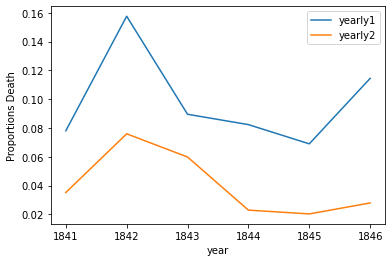

In [1]:
import pandas as pd
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')

proportions = yearly['deaths']/yearly['births']
yearly['proportion_deaths'] = proportions
yearly1 = yearly.loc[0:5]
yearly2 = yearly.loc[6:12]

ax = yearly1.plot(x="year", y="proportion_deaths", label="yearly1")
yearly2.plot(x="year", y="proportion_deaths", label="yearly2", ax=ax)
ax.set_ylabel('Proportions Death')

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


Text(0, 0.5, 'Proportion Deaths')

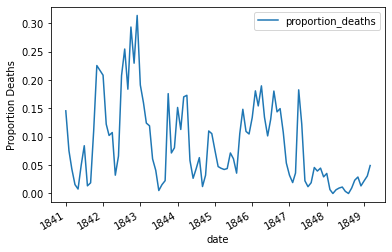

In [3]:
import pandas as pd
monthly = pd.read_csv('monthly_deaths.csv', parse_dates=['date'])
monthly["proportion_deaths"] = monthly['deaths']/monthly['births']
print(monthly.head())
ax = monthly.plot(x='date', y='proportion_deaths')
ax.set_ylabel('Proportion Deaths')


Text(0, 0.5, 'Proportion deaths')

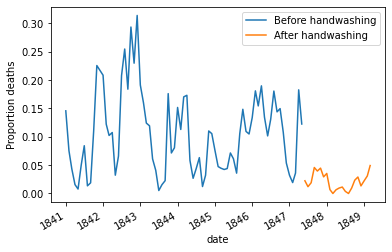

In [4]:
import pandas as pd

handwashing_start = pd.to_datetime('1847-06-01')
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax)
ax.set_ylabel("Proportion deaths")

In [5]:
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

In [6]:
boot_mean_diff = []
for _ in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

confidence = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence

0.025   -0.101439
0.975   -0.067308
dtype: float64

In [7]:
def right():
    print('It is True that doctors should wash their hands.')
    return True
right()

It is True that doctors should wash their hands.


True